In [17]:
import pickle
from utils import create_features, print_classification_report, binarized_confusion_matrix, explain_weights
from sklearn_crfsuite import CRF
from IPython.display import display, HTML
import os
import gensim.models.keyedvectors as word2vec

### Loading the data

In [2]:
DATA_PATH = "./data/{}.pkl"

with open(DATA_PATH.format("train"), "rb") as f:
    train = pickle.load(f)
    
with open(DATA_PATH.format("test"), "rb") as f:
    test = pickle.load(f)

train[0][:5]

[('Anybody', 'NN', 'OUT'),
 ('who', 'WP', 'OUT'),
 ('is', 'VBZ', 'OUT'),
 ('expecting', 'VBG', 'OUT'),
 ('a', 'DT', 'OUT')]

### Reading Pretrained Word2Vec Model

In [18]:
## This is sensitive to capitalization - lowercase (?)
if os.path.exists("./data/GoogleNews-vectors-negative300.bin"):
    WORD2VEC = word2vec.KeyedVectors.load_word2vec_format(
        "./data/GoogleNews-vectors-negative300.bin",
        binary=True)
else:
    print("Pretrain Word2Vec model not found!")

### Baseline

In [3]:
X_train, y_train, X_test, y_test = create_features(train, test)

X_train[0][0]

2019-06-24 16:20:21.496726: Creating features for train set...
2019-06-24 16:20:22.632801: Getting labels for train set...
2019-06-24 16:20:22.645764: Creating features for test set
2019-06-24 16:20:22.972892: Getting labels for test set...
2019-06-24 16:20:22.978870: Finished!


{'bias': 1.0,
 'word.lower()': 'anybody',
 'word[-3:]': 'ody',
 'word.isupper()': False,
 'word.istitle()': True,
 'word.isdigit()': False,
 'postag': 'NN',
 'postag[:2]': 'NN',
 'BOS': True,
 '+1:word.lower()': 'who',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:postag': 'WP',
 '+1:postag[:2]': 'WP'}

In [4]:
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=20,
    all_possible_transitions=False,
)

crf.fit(X_train, y_train)


predictions = crf.predict(X_test)

              precision    recall  f1-score   support

       BEGIN      0.882     0.272     0.415       302
          IN      0.882     0.276     0.421       297
         OUT      1.000     1.000     1.000      1512

   micro avg      0.987     0.794     0.880      2111
   macro avg      0.921     0.516     0.612      2111
weighted avg      0.966     0.794     0.835      2111
 samples avg      0.995     0.904     0.924      2111



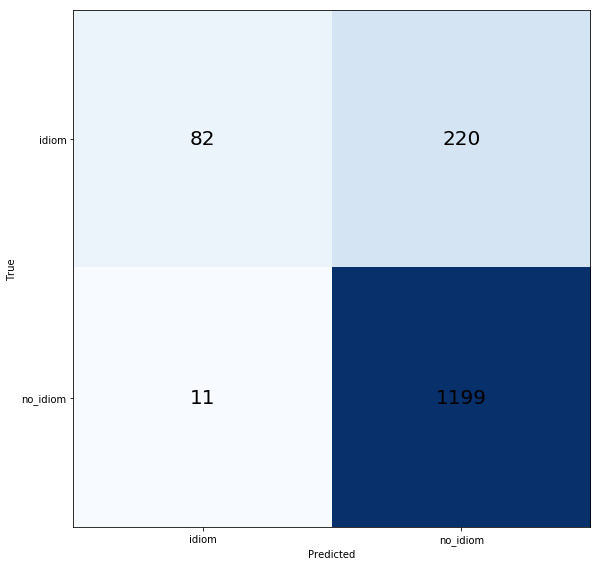

In [5]:
display(explain_weights(crf, html=True))
print_classification_report(predictions, y_test)
binarized_confusion_matrix(predictions, y_test)

### PMI

In [6]:
X_train, y_train, X_test, y_test = create_features(train, test, include_PMI=True)

X_train[0][0]

2019-06-24 16:21:22.871104: Creating features for train set...
2019-06-24 16:21:33.903611: Getting labels for train set...
2019-06-24 16:21:33.929508: Creating features for test set
2019-06-24 16:21:36.491654: Getting labels for test set...
2019-06-24 16:21:36.498637: Finished!


{'bias': 1.0,
 'word.lower()': 'anybody',
 'word[-3:]': 'ody',
 'word.isupper()': False,
 'word.istitle()': True,
 'word.isdigit()': False,
 'postag': 'NN',
 'postag[:2]': 'NN',
 'BOS': True,
 '+1:word.lower()': 'who',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:postag': 'WP',
 '+1:postag[:2]': 'WP',
 '+1:pmi': 2.17}

In [9]:
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=20,
    all_possible_transitions=False,
)

crf.fit(X_train, y_train)

predictions = crf.predict(X_test)

              precision    recall  f1-score   support

       BEGIN      0.953     0.202     0.333       302
          IN      0.953     0.205     0.338       297
         OUT      1.000     1.000     1.000      1512

   micro avg      0.996     0.774     0.871      2111
   macro avg      0.969     0.469     0.557      2111
weighted avg      0.987     0.774     0.811      2111
 samples avg      0.999     0.894     0.920      2111



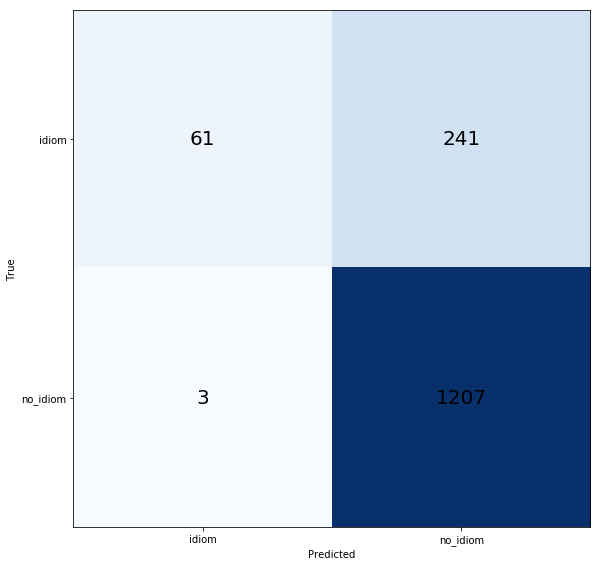

In [10]:
display(explain_weights(crf, html=True))
print_classification_report(predictions, y_test)
binarized_confusion_matrix(predictions, y_test)

### PPMI

In [11]:
X_train, y_train, X_test, y_test = create_features(train, test, include_PPMI=True)

X_train[0][0]

2019-06-24 16:24:59.901114: Creating features for train set...
2019-06-24 16:25:07.727225: Getting labels for train set...
2019-06-24 16:25:07.750157: Creating features for test set
2019-06-24 16:25:09.394762: Getting labels for test set...
2019-06-24 16:25:09.398718: Finished!


{'bias': 1.0,
 'word.lower()': 'anybody',
 'word[-3:]': 'ody',
 'word.isupper()': False,
 'word.istitle()': True,
 'word.isdigit()': False,
 'postag': 'NN',
 'postag[:2]': 'NN',
 'BOS': True,
 '+1:word.lower()': 'who',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:postag': 'WP',
 '+1:postag[:2]': 'WP',
 '+1:ppmi': 2.17}

In [12]:
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=20,
    all_possible_transitions=False,
)

crf.fit(X_train, y_train)


predictions = crf.predict(X_test)

              precision    recall  f1-score   support

       BEGIN      0.969     0.209     0.343       302
          IN      0.969     0.212     0.348       297
         OUT      1.000     1.000     1.000      1512

   micro avg      0.998     0.776     0.873      2111
   macro avg      0.979     0.474     0.564      2111
weighted avg      0.991     0.776     0.814      2111
 samples avg      0.999     0.895     0.921      2111



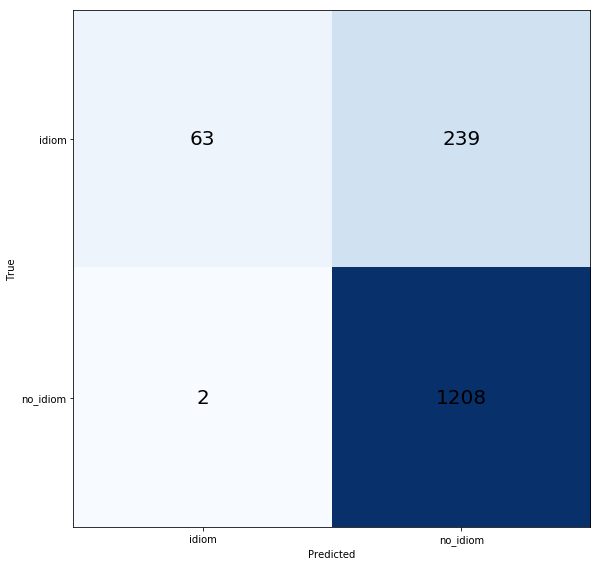

In [13]:
display(explain_weights(crf, html=True))
print_classification_report(predictions, y_test)
binarized_confusion_matrix(predictions, y_test)

### Word2Vec

In [19]:
X_train, y_train, X_test, y_test = create_features(train, test, word2vec=WORD2VEC)

X_train[0][0]

2019-06-24 16:30:59.564199: Creating features for train set...
2019-06-24 16:31:14.789529: Getting labels for train set...
2019-06-24 16:31:14.818447: Creating features for test set
2019-06-24 16:31:19.060010: Getting labels for test set...
2019-06-24 16:31:19.066989: Finished!


{'bias': 1.0,
 'word.lower()': 'anybody',
 'word[-3:]': 'ody',
 'word.isupper()': False,
 'word.istitle()': True,
 'word.isdigit()': False,
 'postag': 'NN',
 'postag[:2]': 'NN',
 'BOS': True,
 '+1:word.lower()': 'who',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:postag': 'WP',
 '+1:postag[:2]': 'WP',
 '+1:word2vec': 0.311652}

In [20]:
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=20,
    all_possible_transitions=False,
)

crf.fit(X_train, y_train)


predictions = crf.predict(X_test)

              precision    recall  f1-score   support

       BEGIN      0.934     0.235     0.376       302
          IN      0.934     0.239     0.381       297
         OUT      1.000     1.000     1.000      1512

   micro avg      0.994     0.784     0.876      2111
   macro avg      0.956     0.491     0.585      2111
weighted avg      0.981     0.784     0.824      2111
 samples avg      0.998     0.899     0.923      2111



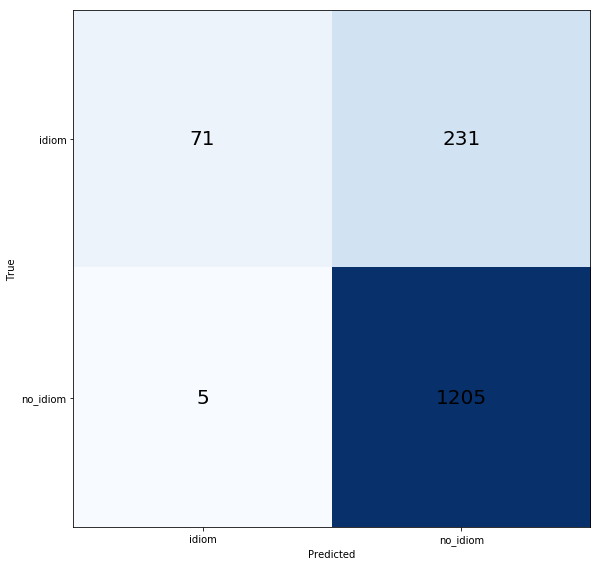

In [21]:
display(explain_weights(crf, html=True))
print_classification_report(predictions, y_test)
binarized_confusion_matrix(predictions, y_test)

### Word2Vec and PPMI

In [44]:
X_train, y_train, X_test, y_test = create_features(train, test, include_PPMI=True, word2vec=WORD2VEC)

X_train[0][0]

2019-06-24 16:48:27.070128: Creating features for train set...
2019-06-24 16:48:54.227623: Getting labels for train set...
2019-06-24 16:48:54.250452: Creating features for test set
2019-06-24 16:49:00.528349: Getting labels for test set...
2019-06-24 16:49:00.535363: Finished!


{'bias': 1.0,
 'word.lower()': 'anybody',
 'word[-3:]': 'ody',
 'word.isupper()': False,
 'word.istitle()': True,
 'word.isdigit()': False,
 'postag': 'NN',
 'postag[:2]': 'NN',
 'BOS': True,
 '+1:word.lower()': 'who',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:postag': 'WP',
 '+1:postag[:2]': 'WP',
 '+1:ppmi': 2.17,
 '+1:word2vec': 0.311652}

In [45]:
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=20,
    all_possible_transitions=False,
)

crf.fit(X_train, y_train)


predictions = crf.predict(X_test)

              precision    recall  f1-score   support

       BEGIN      0.969     0.209     0.343       302
          IN      0.969     0.212     0.348       297
         OUT      1.000     1.000     1.000      1512

   micro avg      0.998     0.776     0.873      2111
   macro avg      0.979     0.474     0.564      2111
weighted avg      0.991     0.776     0.814      2111
 samples avg      0.999     0.895     0.921      2111



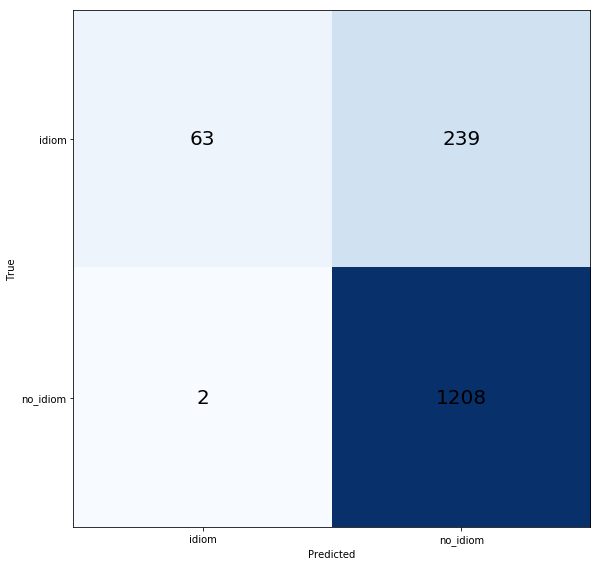

In [46]:
display(explain_weights(crf, html=True))
print_classification_report(predictions, y_test)
binarized_confusion_matrix(predictions, y_test)

### Basic Features, 2 words ahead/behind

In [22]:
X_train, y_train, X_test, y_test = create_features(train, test, dist=2)

X_train[0][0]

2019-06-24 16:34:30.309817: Creating features for train set...
2019-06-24 16:34:32.526096: Getting labels for train set...
2019-06-24 16:34:32.553055: Creating features for test set
2019-06-24 16:34:33.578998: Getting labels for test set...
2019-06-24 16:34:33.584983: Finished!


{'bias': 1.0,
 'word.lower()': 'anybody',
 'word[-3:]': 'ody',
 'word.isupper()': False,
 'word.istitle()': True,
 'word.isdigit()': False,
 'postag': 'NN',
 'postag[:2]': 'NN',
 'BOS': True,
 '+1:word.lower()': 'who',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:postag': 'WP',
 '+1:postag[:2]': 'WP',
 '+2:word.lower()': 'is',
 '+2:word.istitle()': False,
 '+2:word.isupper()': False,
 '+2:postag': 'VBZ',
 '+2:postag[:2]': 'VB'}

In [23]:
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=20,
    all_possible_transitions=False,
)

crf.fit(X_train, y_train)


predictions = crf.predict(X_test)


              precision    recall  f1-score   support

       BEGIN      0.951     0.321     0.480       302
          IN      0.951     0.327     0.486       297
         OUT      1.000     1.000     1.000      1512

   micro avg      0.994     0.808     0.892      2111
   macro avg      0.967     0.549     0.655      2111
weighted avg      0.986     0.808     0.853      2111
 samples avg      0.998     0.910     0.931      2111



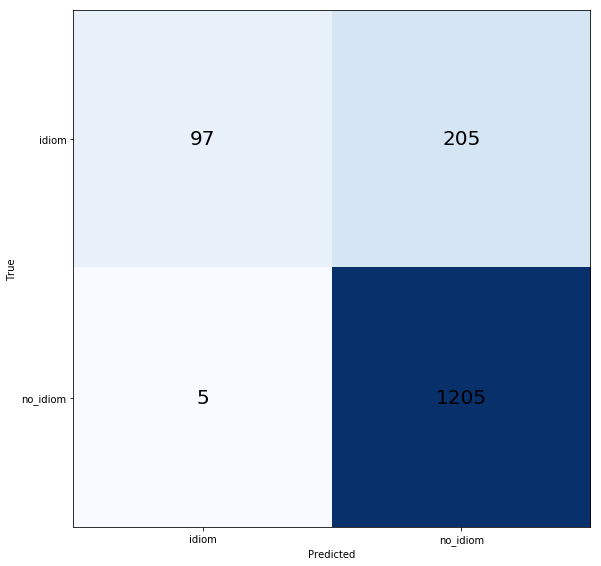

In [24]:
display(explain_weights(crf, html=True))
print_classification_report(predictions, y_test)
binarized_confusion_matrix(predictions, y_test)

### PPMI, 2 words ahead/behind

In [25]:
X_train, y_train, X_test, y_test = create_features(train, test, dist=2, include_PPMI=True)

X_train[0][0]

2019-06-24 16:36:54.127175: Creating features for train set...
2019-06-24 16:37:14.745970: Getting labels for train set...
2019-06-24 16:37:14.768908: Creating features for test set
2019-06-24 16:37:19.855079: Getting labels for test set...
2019-06-24 16:37:19.862060: Finished!


{'bias': 1.0,
 'word.lower()': 'anybody',
 'word[-3:]': 'ody',
 'word.isupper()': False,
 'word.istitle()': True,
 'word.isdigit()': False,
 'postag': 'NN',
 'postag[:2]': 'NN',
 'BOS': True,
 '+1:word.lower()': 'who',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:postag': 'WP',
 '+1:postag[:2]': 'WP',
 '+1:ppmi': 2.17,
 '+2:word.lower()': 'is',
 '+2:word.istitle()': False,
 '+2:word.isupper()': False,
 '+2:postag': 'VBZ',
 '+2:postag[:2]': 'VB',
 '+2:ppmi': 0.35}

In [26]:
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=20,
    all_possible_transitions=False,
)

crf.fit(X_train, y_train)


predictions = crf.predict(X_test)




              precision    recall  f1-score   support

       BEGIN      0.838     0.325     0.468       302
          IN      0.838     0.330     0.473       297
         OUT      1.000     1.000     1.000      1512

   micro avg      0.978     0.809     0.886      2111
   macro avg      0.892     0.551     0.647      2111
weighted avg      0.954     0.809     0.850      2111
 samples avg      0.992     0.911     0.927      2111



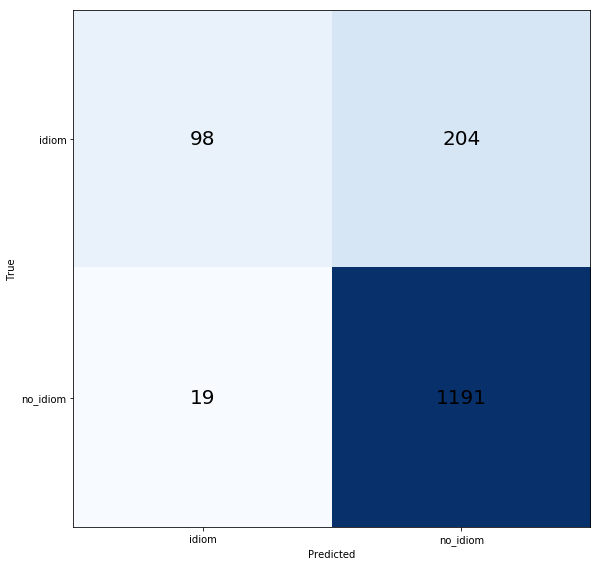

In [27]:
display(explain_weights(crf, html=True))
print_classification_report(predictions, y_test)
binarized_confusion_matrix(predictions, y_test)

### Word2Vec, 2 words ahead/behind

In [32]:
X_train, y_train, X_test, y_test = create_features(train, test, dist=2, word2vec=WORD2VEC)

X_train[0][0]

2019-06-24 16:40:11.066686: Creating features for train set...
2019-06-24 16:40:40.420909: Getting labels for train set...
2019-06-24 16:40:40.443506: Creating features for test set
2019-06-24 16:40:48.210201: Getting labels for test set...
2019-06-24 16:40:48.217230: Finished!


{'bias': 1.0,
 'word.lower()': 'anybody',
 'word[-3:]': 'ody',
 'word.isupper()': False,
 'word.istitle()': True,
 'word.isdigit()': False,
 'postag': 'NN',
 'postag[:2]': 'NN',
 'BOS': True,
 '+1:word.lower()': 'who',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:postag': 'WP',
 '+1:postag[:2]': 'WP',
 '+1:word2vec': 0.311652,
 '+2:word.lower()': 'is',
 '+2:word.istitle()': False,
 '+2:word.isupper()': False,
 '+2:postag': 'VBZ',
 '+2:postag[:2]': 'VB',
 '+2:word2vec': 0.2359705}

In [33]:
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=20,
    all_possible_transitions=False,
)

crf.fit(X_train, y_train)


predictions = crf.predict(X_test)

              precision    recall  f1-score   support

       BEGIN      0.953     0.272     0.423       302
          IN      0.953     0.276     0.428       297
         OUT      1.000     1.000     1.000      1512

   micro avg      0.995     0.794     0.883      2111
   macro avg      0.969     0.516     0.617      2111
weighted avg      0.987     0.794     0.837      2111
 samples avg      0.998     0.904     0.926      2111



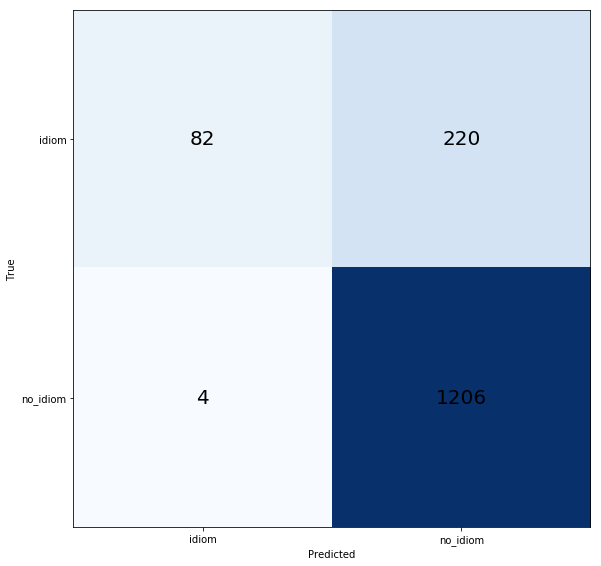

In [34]:
display(explain_weights(crf, html=True))
print_classification_report(predictions, y_test)
binarized_confusion_matrix(predictions, y_test)

### Word2Vec and PPMI, 2 words ahead/behind

In [47]:
X_train, y_train, X_test, y_test = create_features(train, test, dist=2, include_PPMI=True, word2vec=WORD2VEC)

X_train[0][0]

2019-06-24 16:51:30.885307: Creating features for train set...
2019-06-24 16:52:18.741750: Getting labels for train set...
2019-06-24 16:52:18.761846: Creating features for test set
2019-06-24 16:52:31.033765: Getting labels for test set...
2019-06-24 16:52:31.043733: Finished!


{'bias': 1.0,
 'word.lower()': 'anybody',
 'word[-3:]': 'ody',
 'word.isupper()': False,
 'word.istitle()': True,
 'word.isdigit()': False,
 'postag': 'NN',
 'postag[:2]': 'NN',
 'BOS': True,
 '+1:word.lower()': 'who',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:postag': 'WP',
 '+1:postag[:2]': 'WP',
 '+1:ppmi': 2.17,
 '+1:word2vec': 0.311652,
 '+2:word.lower()': 'is',
 '+2:word.istitle()': False,
 '+2:word.isupper()': False,
 '+2:postag': 'VBZ',
 '+2:postag[:2]': 'VB',
 '+2:ppmi': 0.35,
 '+2:word2vec': 0.2359705}

In [48]:

crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=20,
    all_possible_transitions=False,
)

crf.fit(X_train, y_train)


predictions = crf.predict(X_test)


              precision    recall  f1-score   support

       BEGIN      0.823     0.338     0.479       302
          IN      0.823     0.343     0.485       297
         OUT      1.000     1.000     1.000      1512

   micro avg      0.975     0.813     0.887      2111
   macro avg      0.882     0.560     0.654      2111
weighted avg      0.950     0.813     0.853      2111
 samples avg      0.990     0.912     0.927      2111



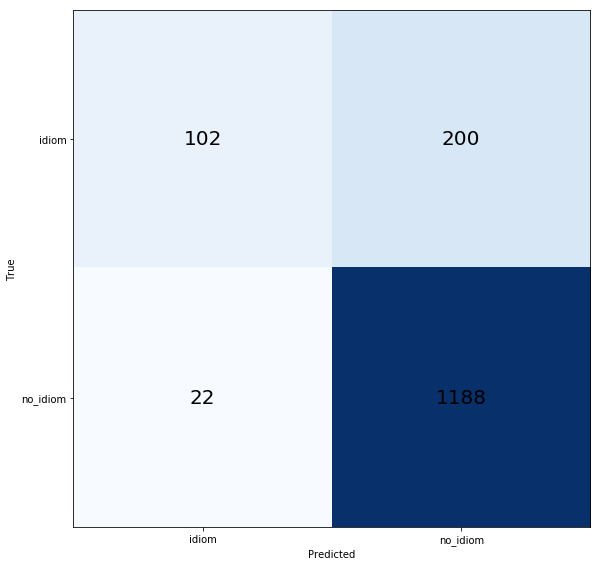

In [49]:
display(explain_weights(crf, html=True))
print_classification_report(predictions, y_test)
binarized_confusion_matrix(predictions, y_test)

### Basic Features, 3 words ahead/behind

In [35]:
X_train, y_train, X_test, y_test = create_features(train, test, dist=3)

X_train[0][0]

2019-06-24 16:41:55.767831: Creating features for train set...
2019-06-24 16:41:59.754540: Getting labels for train set...
2019-06-24 16:41:59.779473: Creating features for test set
2019-06-24 16:42:01.172117: Getting labels for test set...
2019-06-24 16:42:01.178544: Finished!


{'bias': 1.0,
 'word.lower()': 'anybody',
 'word[-3:]': 'ody',
 'word.isupper()': False,
 'word.istitle()': True,
 'word.isdigit()': False,
 'postag': 'NN',
 'postag[:2]': 'NN',
 'BOS': True,
 '+1:word.lower()': 'who',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:postag': 'WP',
 '+1:postag[:2]': 'WP',
 '+2:word.lower()': 'is',
 '+2:word.istitle()': False,
 '+2:word.isupper()': False,
 '+2:postag': 'VBZ',
 '+2:postag[:2]': 'VB',
 '+3:word.lower()': 'expecting',
 '+3:word.istitle()': False,
 '+3:word.isupper()': False,
 '+3:postag': 'VBG',
 '+3:postag[:2]': 'VB'}

In [36]:
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=20,
    all_possible_transitions=False,
)

crf.fit(X_train, y_train)


predictions = crf.predict(X_test)

              precision    recall  f1-score   support

       BEGIN      0.953     0.334     0.495       302
          IN      0.953     0.340     0.501       297
         OUT      1.000     1.000     1.000      1512

   micro avg      0.994     0.812     0.894      2111
   macro avg      0.969     0.558     0.665      2111
weighted avg      0.987     0.812     0.858      2111
 samples avg      0.998     0.912     0.932      2111



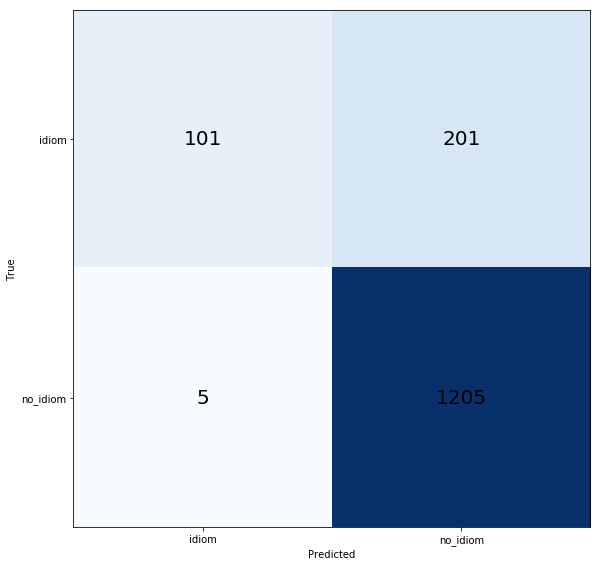

In [37]:
display(explain_weights(crf, html=True))
print_classification_report(predictions, y_test)
binarized_confusion_matrix(predictions, y_test)

### PPMI, 3 words ahead/behind

In [38]:
X_train, y_train, X_test, y_test = create_features(train, test, dist=3, include_PPMI=True)

X_train[0][0]

2019-06-24 16:43:43.148507: Creating features for train set...
2019-06-24 16:44:08.991954: Getting labels for train set...
2019-06-24 16:44:09.018850: Creating features for test set
2019-06-24 16:44:16.459610: Getting labels for test set...
2019-06-24 16:44:16.466555: Finished!


{'bias': 1.0,
 'word.lower()': 'anybody',
 'word[-3:]': 'ody',
 'word.isupper()': False,
 'word.istitle()': True,
 'word.isdigit()': False,
 'postag': 'NN',
 'postag[:2]': 'NN',
 'BOS': True,
 '+1:word.lower()': 'who',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:postag': 'WP',
 '+1:postag[:2]': 'WP',
 '+1:ppmi': 2.17,
 '+2:word.lower()': 'is',
 '+2:word.istitle()': False,
 '+2:word.isupper()': False,
 '+2:postag': 'VBZ',
 '+2:postag[:2]': 'VB',
 '+2:ppmi': 0.35,
 '+3:word.lower()': 'expecting',
 '+3:word.istitle()': False,
 '+3:word.isupper()': False,
 '+3:postag': 'VBG',
 '+3:postag[:2]': 'VB',
 '+3:ppmi': 0}

In [39]:
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=20,
    all_possible_transitions=False,
)

crf.fit(X_train, y_train)


predictions = crf.predict(X_test)

              precision    recall  f1-score   support

       BEGIN      0.829     0.321     0.463       302
          IN      0.829     0.327     0.469       297
         OUT      1.000     1.000     1.000      1512

   micro avg      0.977     0.808     0.885      2111
   macro avg      0.886     0.549     0.644      2111
weighted avg      0.951     0.808     0.848      2111
 samples avg      0.991     0.910     0.926      2111



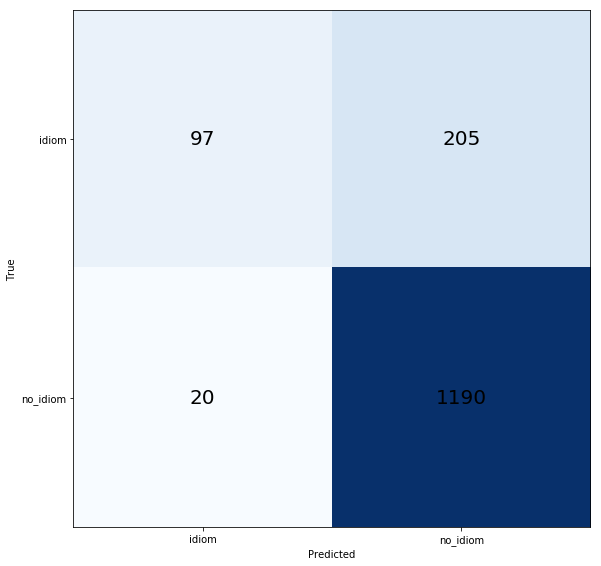

In [40]:
display(explain_weights(crf, html=True))
print_classification_report(predictions, y_test)
binarized_confusion_matrix(predictions, y_test)

### Word2Vec, 3 words ahead/behind

In [41]:
X_train, y_train, X_test, y_test = create_features(train, test, dist=3, include_PPMI=True)

X_train[0][0]

2019-06-24 16:45:01.818384: Creating features for train set...
2019-06-24 16:45:29.421405: Getting labels for train set...
2019-06-24 16:45:29.442386: Creating features for test set
2019-06-24 16:45:36.869630: Getting labels for test set...
2019-06-24 16:45:36.878608: Finished!


{'bias': 1.0,
 'word.lower()': 'anybody',
 'word[-3:]': 'ody',
 'word.isupper()': False,
 'word.istitle()': True,
 'word.isdigit()': False,
 'postag': 'NN',
 'postag[:2]': 'NN',
 'BOS': True,
 '+1:word.lower()': 'who',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:postag': 'WP',
 '+1:postag[:2]': 'WP',
 '+1:ppmi': 2.17,
 '+2:word.lower()': 'is',
 '+2:word.istitle()': False,
 '+2:word.isupper()': False,
 '+2:postag': 'VBZ',
 '+2:postag[:2]': 'VB',
 '+2:ppmi': 0.35,
 '+3:word.lower()': 'expecting',
 '+3:word.istitle()': False,
 '+3:word.isupper()': False,
 '+3:postag': 'VBG',
 '+3:postag[:2]': 'VB',
 '+3:ppmi': 0}

In [42]:
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=20,
    all_possible_transitions=False,
)

crf.fit(X_train, y_train)


predictions = crf.predict(X_test)

              precision    recall  f1-score   support

       BEGIN      0.829     0.321     0.463       302
          IN      0.829     0.327     0.469       297
         OUT      1.000     1.000     1.000      1512

   micro avg      0.977     0.808     0.885      2111
   macro avg      0.886     0.549     0.644      2111
weighted avg      0.951     0.808     0.848      2111
 samples avg      0.991     0.910     0.926      2111



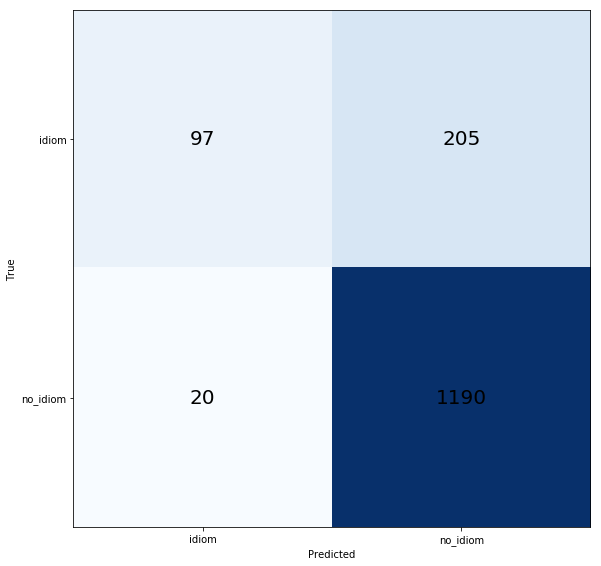

In [43]:
display(explain_weights(crf, html=True))
print_classification_report(predictions, y_test)
binarized_confusion_matrix(predictions, y_test)

### Word2Vec and PPMI, 3 words ahead/behind

In [51]:
X_train, y_train, X_test, y_test = create_features(train, test, dist=2, include_PPMI=True, word2vec=WORD2VEC)

X_train[0][0]

2019-06-24 16:52:53.232711: Creating features for train set...
2019-06-24 16:53:43.622746: Getting labels for train set...
2019-06-24 16:53:43.647648: Creating features for test set
2019-06-24 16:53:55.577168: Getting labels for test set...
2019-06-24 16:53:55.584103: Finished!


{'bias': 1.0,
 'word.lower()': 'anybody',
 'word[-3:]': 'ody',
 'word.isupper()': False,
 'word.istitle()': True,
 'word.isdigit()': False,
 'postag': 'NN',
 'postag[:2]': 'NN',
 'BOS': True,
 '+1:word.lower()': 'who',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:postag': 'WP',
 '+1:postag[:2]': 'WP',
 '+1:ppmi': 2.17,
 '+1:word2vec': 0.311652,
 '+2:word.lower()': 'is',
 '+2:word.istitle()': False,
 '+2:word.isupper()': False,
 '+2:postag': 'VBZ',
 '+2:postag[:2]': 'VB',
 '+2:ppmi': 0.35,
 '+2:word2vec': 0.2359705}

In [52]:
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=20,
    all_possible_transitions=False,
)

crf.fit(X_train, y_train)


predictions = crf.predict(X_test)


              precision    recall  f1-score   support

       BEGIN      0.823     0.338     0.479       302
          IN      0.823     0.343     0.485       297
         OUT      1.000     1.000     1.000      1512

   micro avg      0.975     0.813     0.887      2111
   macro avg      0.882     0.560     0.654      2111
weighted avg      0.950     0.813     0.853      2111
 samples avg      0.990     0.912     0.927      2111



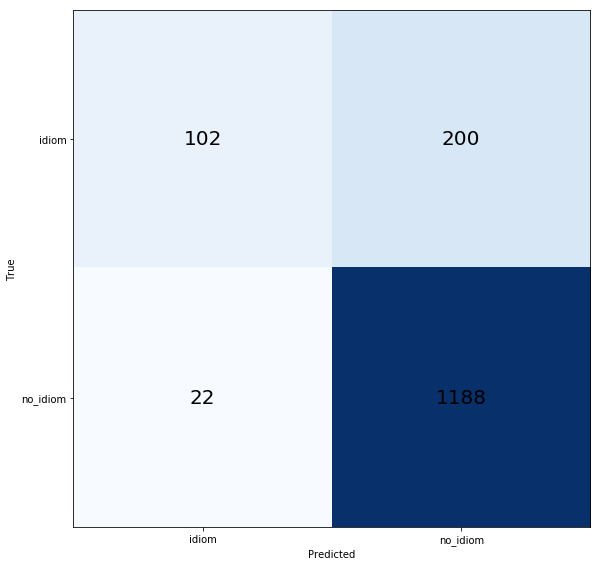

In [53]:
display(explain_weights(crf, html=True))
print_classification_report(predictions, y_test)
binarized_confusion_matrix(predictions, y_test)